My grandmother always keeps saying how winters used to be colder when she was young.
She recalls frost of -20 C being normal most winters, nowadays not so much.
Let's see if it's just a sentiment or a fact.


In [46]:
import datetime
import time
import random

dates = [ "01-" + str(x) for x in range(2015, 2018)]
#final = pd.DataFrame()
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv:42.0) Gecko/20100101 Firefox/42.0'}

for date in dates:
    time.sleep(random.randint(3, 13))
    r = requests.get("https://en.tutiempo.net/climate/{}/ws-103840.html".format(date), headers=headers)
    soup = BeautifulSoup(r.text, "lxml")

    table = soup.find("div", "mt5 minoverflow")
    if table:
        df = pd.read_html(str(table))[0]
        df.columns = df.iloc[0]
        df.drop(0, inplace=True)
        df.drop(df.index[-2:], inplace=True)
        df.index = df['Day']
        df.drop(['Day'], inplace=True, axis=1)
        df = df[['T', 'TM', 'Tm']]

        df.index = df.index.map(lambda x: datetime.date(int(date[3:]), 1, int(x)))
        final = final.append(df)
    else:
        print("No table found for {}".format(date))


No table found for 01-1972
No table found for 01-1993
No table found for 01-1994
No table found for 01-1995
No table found for 01-1996
No table found for 01-1997
No table found for 01-1998
No table found for 01-1999


KeyboardInterrupt: 

In [85]:
test = final.copy()

In [88]:
mask = test.Tm == '-'
test = test[~mask]
test = test.applymap(float)

In [90]:
grouped = test.groupby(test.index.map(lambda x: x.year)).agg({'Tm' : np.min})

<IPython.core.display.Javascript object>


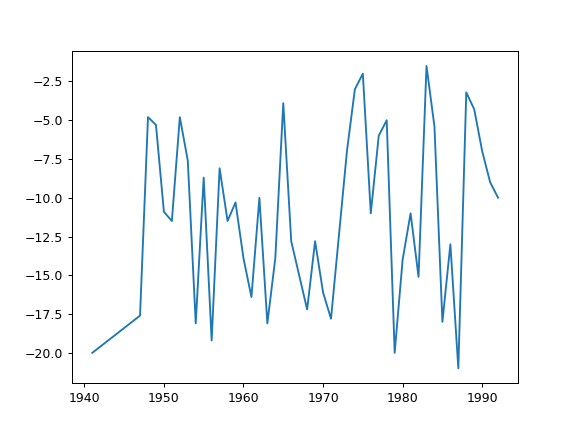

In [95]:
import matplotlib.pyplot as plt
%matplotlib notebook

plt.plot(grouped, '-')

In [96]:
final.to_pickle("winter temps.pkl")

In [64]:
test['year'] = test.index.map(lambda x: x.year)

In [66]:
test.groupby("year").min()

0        T    TM     Tm
year                   
1941  -0.6  -1.1   -1.1
1947  -0.1  -0.9   -0.4
1948    -1  -0.4   -0.4
1949  -0.2  -0.4   -0.4
1950  -0.2  -0.4   -0.4
1951  -0.3  -0.4   -0.9
1952  -0.9  -0.4   -0.4
1953  -0.3    -2   -0.4
1954  -0.4  -0.4   -0.9
1955  -0.2  -0.4   -0.9
1956  -0.3  -0.4   -0.4
1957  -0.6  -0.4   -0.4
1958  -0.1  -0.9   -0.4
1959  -0.4  -0.9   -0.9
1960  -2.3  -0.4   -1.1
1961  -0.4  -0.9  -10.3
1962  -0.5    -2    -10
1963  -0.9  -0.4   -1.1
1964  -0.4  -0.9   -1.1
1965  -0.1   0.2   -1.1
1966  -0.9  -1.1    -10
1967  -0.1    -2   -1.1
1968  -0.5  -0.9   -1.1
1969  -0.1  -1.1   -1.1
1970  -0.3  -1.1   -1.1
1971  -0.3  -1.1    -10
1973  -0.1     0     -1
1974  -0.7     0      -
1975   1.1    10     -1
1976  -0.3    -3     -1
1977  -0.1    -1     -1
1978  -0.1    -1     -1
1979  -0.1    -1    -10
1980  -0.5    -1     -1
1981  -0.2    -1     -1
1982  -0.8  -0.6   -0.5
1983   0.5    10   -0.2
1984  -0.2  -0.4     -1
1985  -0.8  -1.6     -1
1986  -0.3  -0.9   -0.3
1987  -0.3    -1   -0.1
1988  -0.4     0   -0.2
1989  -0.2   1.5   -0.6
1990  -0.4  -0.6     -1
1991  -0.4    -3   -0.1
1992  -0.1    -2   -0.1

In [73]:
test[test.year == 1941]['Tm'].min()

'-1.1'

In [58]:
np.min([-10, 1])

-10

In [70]:
test

0               T    TM     Tm  year
Day                                 
1941-01-01   -8.5  -6.1  -12.8  1941
1941-01-02  -11.4  -8.9  -13.9  1941
1941-01-03   -9.2  -7.8  -11.1  1941
1941-01-04   -8.3  -7.2  -11.1  1941
1941-01-05   -7.3  -7.2   -7.8  1941
1941-01-06   -7.2  -6.1   -8.9  1941
1941-01-07   -5.9    -5   -7.8  1941
1941-01-08   -4.3  -2.8   -6.1  1941
1941-01-09     -2     0   -3.9  1941
1941-01-10   -5.4  -2.8   -8.9  1941
1941-01-11   -3.7  -2.2   -7.8  1941
1941-01-12   -4.1  -2.2   -6.1  1941
1941-01-13   -1.9  -1.1   -6.1  1941
1941-01-14   -0.6   1.1   -2.2  1941
1941-01-15   -3.1     0   -3.9  1941
1941-01-16   -6.1  -3.9   -7.2  1941
1941-01-17   -8.1  -2.8    -10  1941
1941-01-18   -9.6  -6.1  -12.8  1941
1941-01-19   -7.9    -5  -13.9  1941
1941-01-20   -3.5  -1.1   -7.2  1941
1941-01-21   -0.6   1.1   -3.9  1941
1941-01-22   -1.3     0   -2.2  1941
1941-01-23    0.2   1.1   -1.1  1941
1941-01-24   -0.6   1.1   -2.2  1941
1941-01-25   -1.8  -1.1   -3.9  1941
1941-01-26   -7.2  -2.8  -12.2  1941
1941-01-27  -11.4  -3.9    -15  1941
1941-01-28  -13.2  -8.9  -17.2  1941
1941-01-29  -16.3  -8.9  -18.9  1941
1941-01-30  -14.1  -7.8    -20  1941
...           ...   ...    ...   ...
1992-01-02    6.7     8    4.2  1992
1992-01-03    5.1   8.4    2.5  1992
1992-01-04    5.6     8      3  1992
1992-01-05    4.6     6      3  1992
1992-01-06    4.3     9    2.8  1992
1992-01-07    6.1     9      3  1992
1992-01-08    4.8     8      0  1992
1992-01-09    6.4  11.5    2.8  1992
1992-01-10    1.3   3.8   -2.1  1992
1992-01-11   -2.4   1.2   -5.1  1992
1992-01-12    1.6     4     -3  1992
1992-01-13   -0.2   2.5     -2  1992
1992-01-14      5     7    0.1  1992
1992-01-15      6   6.9    5.5  1992
1992-01-16    5.3   6.4      4  1992
1992-01-17    3.2     6      0  1992
1992-01-18    4.4   6.4    0.2  1992
1992-01-19    4.5     7     -1  1992
1992-01-20   -4.6   1.5     -8  1992
1992-01-21   -6.2    -3   -8.6  1992
1992-01-22   -7.4  -4.3    -10  1992
1992-01-23   -5.6    -2   -8.3  1992
1992-01-24   -3.9     1     -7  1992
1992-01-25   -5.1    -3   -6.3  1992
1992-01-26   -1.9     1   -5.6  1992
1992-01-27    1.6     3      0  1992
1992-01-28      0   2.1     -1  1992
1992-01-29    1.4   2.3    0.5  1992
1992-01-30    2.4     4    0.9  1992
1992-01-31   -0.1   1.3     -1  1992

[1426 rows x 4 columns]